I applied different regression techniques to predict the data of calories burned in the exercises from the knowledge of duration (t), heart rate (h), body temperature (T), age (A), weight (W), height (H) and gender (G). It was verified that the variable that most influences the burning of calories is duration, followed by heart rate and body temperature. However, only with the considerations of all set of features that was possible to reduce the error to less than 1% of the mean. From the following table, we can see the models adopted an the mean error of each one.

    
| Regression Model | Mean Error | R2   |
|-----------|------------|------|
| Linear    | 13.59       | 0.904 |
| Quadratic | 11.36       | 0.922 |
| PowerLaw  | 12.02      | 0.895 |
| Multi-Linear (t,H) | 11.67      | 0.94 |
| Multi-Quadratic (t,H) | 8.29      | 0.96 |
| Multi-PowerLaw (t,H) | 8.59      | 0.96 |
| Multi-Linear (t,H,T) | 10.64      | 0.94 |
| Multi-Quadratic (t,H,T) | 8.31      | 0.95 |
| Multi-Linear (all feat.) | 8.44      | 0.97 |
| Multi-Quadratic (all feat.) | 2.24      | 0.997 |
| Multi-Cubic (all feat.) | 0.25      | 1.00 |
| Multi-Quartic (all feat.) | 0.25      | 1.00 |
    
    


<a id="toc"></a>
  
  
  <div  style="margin-top: 9px; background-color: #efefef; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    <center>
        <h2>Content</h2>
    </center>

   
<ol>
    <li><a href="#01" style="color: #37509b;">Pre-Processing</a></li>
    <li><a href="#02" style="color: #37509b;">One Feature Regression</a></li>
    <li><a href="#03" style="color: #37509b;">Double Feature Regression</a></li>
    <li><a href="#04" style="color: #37509b;">Three Feature Regression</a></li>
    <li><a href="#05" style="color: #37509b;">Regression with all Features</a></li>

</ol>


</div>

<a id="01" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
<div  style="margin-top: 9px; background-color: #efefef; padding-left:35px; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    
<h1>1. Pre-Processing</h1>
    
<ol type="i">
<!--     <li><a href="#0101" style="color: #37509b;">Inicialização</a></li>
    <li><a href="#0102" style="color: #37509b;">Pacotes</a></li>
    <li><a href="#0103" style="color: #37509b;">Funcoes</a></li>
    <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li>
    <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li>
 -->
</ol>
    
    
</div>


In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

/kaggle/input/fmendesdat263xdemos/exercise.csv
/kaggle/input/fmendesdat263xdemos/calories.csv


In [3]:
# Dataframe to models
df_model_properties = pd.DataFrame({
    'Model':['linear_t','quad_t','SPPM_t','DPPM_t',
             'multlin_th','multquad_th','power_th',
             'multlin_tht','multquad_tht',
             'multlin_all','multquad_all',
             'multcub_all',
             'multquart_all'],
    
    'Features': [['t'],['t'],['t'],['t'],['t','h'],
                 ['t','h'],['t','h'],['t','h','T'],
                 ['t','h','T'],['t','h','T','A','W','H'],
                 ['t','h','T','A','W','G','H'],
                 ['t','h','T','A','W','G','H'],
                 ['t','h','T','A','W','G','H']],
    'MAE_test':['','','','','','','','','','','','',''],
    'R2_test':['','','','','','','','','','','','',''],
    'MAE_train':['','','','','','','','','','','','',''],
    'R2_train':['','','','','','','','','','','','','']
}).set_index('Model')

### Import Dataset

In [5]:
import pandas as pd
df_cal = pd.read_csv(os.path.join(dirname,'calories.csv'))

df_ex  = pd.read_csv(os.path.join(dirname,'exercise.csv'))

df = pd.merge(df_ex, df_cal, on = 'User_ID')
df.head()

df['Gender'] = pd.get_dummies(df['Gender'], prefix_sep='_', drop_first=True)
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  uint8  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), uint8(1)
memory usage: 1.0 MB


### Features Influences on Calories

Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64


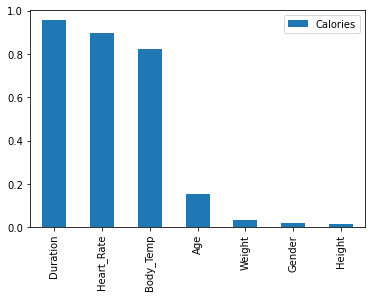

In [4]:
correlations = df.drop(columns=['User_ID'],axis=1).copy().corr()['Calories']
correlations = correlations.sort_values(ascending=False).drop('Calories',axis=0)
print(correlations)
correlations.to_frame().plot.bar();

From here, it is possible to see that the features that most contribute to the total calory burned on exercises is the 'duration', the 'heart rate' and the 'body temperature'

Let's rename the variables as:

* $t$ : Duration
* $h$ : Heart_Rate
* $T$ : Body_Temp
* $A$ : Age
* $W$ : Weight
* $G$ : Gender
* $H$ : Height
* $C$ : Calories

### Scatter Matrix

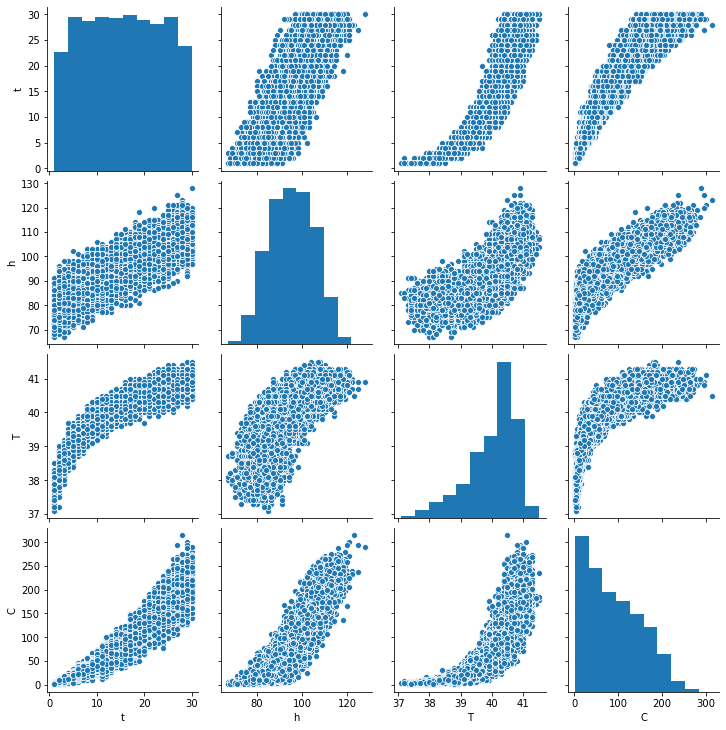

In [5]:
df_3f = df[['Duration','Heart_Rate','Body_Temp','Calories']].copy()
df_3f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Calories':'C'},inplace=True)


df_6f = df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Height','Calories']].copy()
df_6f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Age':'A',
                      'Weight':'W',
                      'Height':'H',
                      'Calories':'C'},inplace=True)


df_7f = df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Gender','Height','Calories']].copy()
df_7f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Age':'A',
                      'Weight':'W',
                      'Gender':'G',
                      'Height':'H',
                      'Calories':'C'},inplace=True)

sns.pairplot(df_3f)

From the scatter graphics, it's possible to conclude that, despite the strong correlation between the variables $t$ and $C$, the relation between them is not trivially linear. It's possible that a quadratic regression approach can substantially reduce the errors. Another way to deal with this problem is with power law models. To do this, let's check the relation betweeen logs of variables.

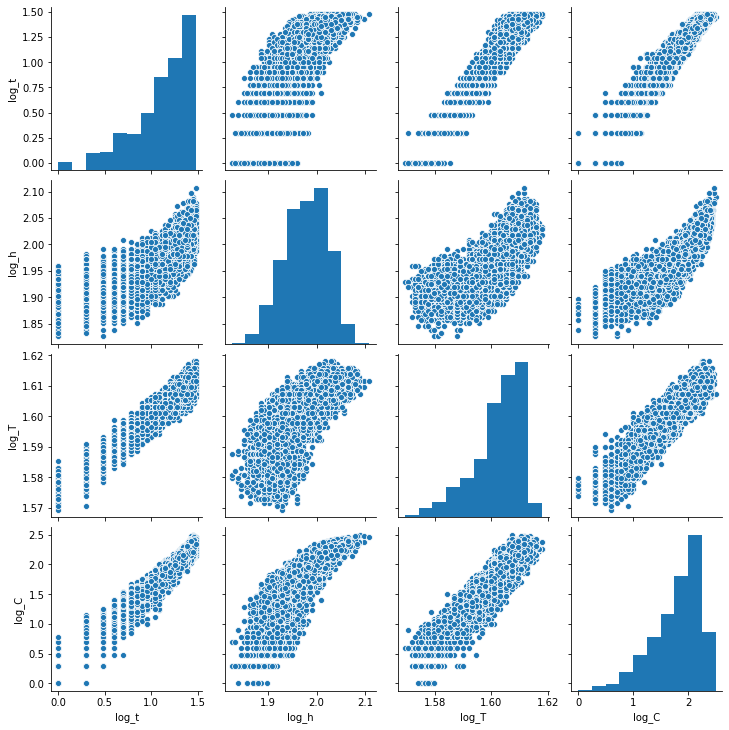

In [6]:
conditions = True
conditions &= df_3f['C'] > 0
conditions &= df_3f['t'] > 0

df_3f_log = np.log10(df_3f[conditions]).copy()

df_3f_log.rename(columns={'t':'log_t',
                      'h':'log_h',
                      'T':'log_T',
                      'C':'log_C'},inplace=True)

sns.pairplot(df_3f_log)


<a id="02" style="
  background-color: #36454F;
  border: none;
  color: black;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
 
<div  style="margin-top: 9px; background-color: #efefef; padding-left:35px; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    
<h1>2. One Feature Regression</h1>
    
<ol type="i">
    <li><a href="#0201" style="color: #37509b;">Linear Model</a></li>
    <li><a href="#0202" style="color: #37509b;">Quadratic Model</a></li>
    <li><a href="#0203" style="color: #37509b;">Power Law Models</a></li>
    <li><a href="#0204" style="color: #37509b;">Model Comparison</a></li>
<!--     <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li> -->

</ol>
</div>


In [8]:
# Splitting into test and train

C_i = df_3f['C'].to_numpy()
t_i = df_3f['t'].to_numpy()
t_train, t_test, C_train, C_test = train_test_split(t_i, C_i, test_size=0.333, random_state=42)

logC_i = df_3f_log['log_C'].to_numpy()
logt_i = df_3f_log['log_t'].to_numpy()
logt_train, logt_test, logC_train, logC_test = train_test_split( logt_i, logC_i, test_size=0.333, random_state=42)

# Regression relating **Calories** and **Duration**, that are the most correlated variables.

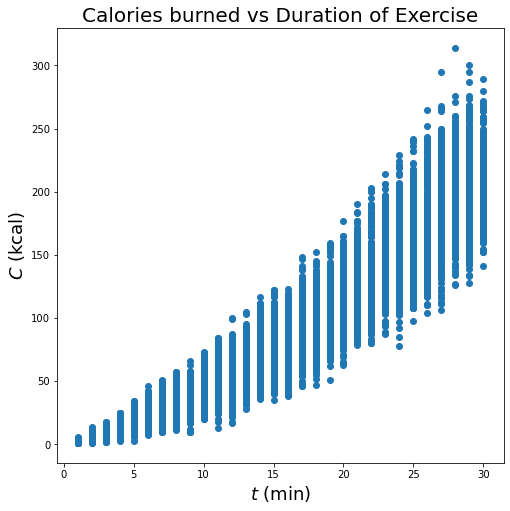

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f['t'],df_3f['C'])
plt.xlabel('$t$ (min)', size = 18)
plt.ylabel('$C$ (kcal)', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)
plt.show()

<a id="0201"></a>
<h2>2.a Linear Model<a href="#02"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

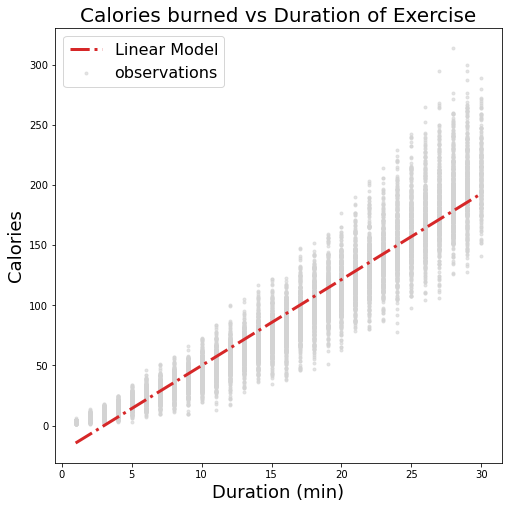

In [10]:
lin_reg = linear_model.LinearRegression()

# Train the model using the training sets
lin_reg.fit(t_train.reshape(-1,1)   ,C_train.reshape(-1,1))

# Selecting a interval for duration
t_val = np.linspace(t_i.min(),t_i.max(),100)

# Predicting
C_lin_model = lin_reg.predict(t_val.reshape(-1,1))

# Plotting and comparing
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [11]:
# Predictions for the test set
C_lin_test = lin_reg.predict(t_test.reshape(-1,1))

# Predictions for the train set
C_lin_train = lin_reg.predict(t_train.reshape(-1,1))

# Filling dataframe
df_model_properties.loc['linear_t']['MAE_test'] = mean_absolute_error(C_lin_test,C_test)
df_model_properties.loc['linear_t']['R2_test'] = r2_score(C_lin_test,C_test)
df_model_properties.loc['linear_t']['MAE_train'] = mean_absolute_error(C_lin_train,C_train)
df_model_properties.loc['linear_t']['R2_train'] = r2_score(C_lin_train,C_train)

# Printing  results
print('Mean error (test): ',df_model_properties.loc['linear_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['linear_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['linear_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['linear_t']['R2_train'])


Mean error (test):  13.593873543531656
R2 (test):     0.9026309937324182

Mean error (train):  13.502767761900637
R2 (train):   0.9044073844231749


<a id="0202"></a>
<h2>2.b Quadratic Model<a href="#02"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

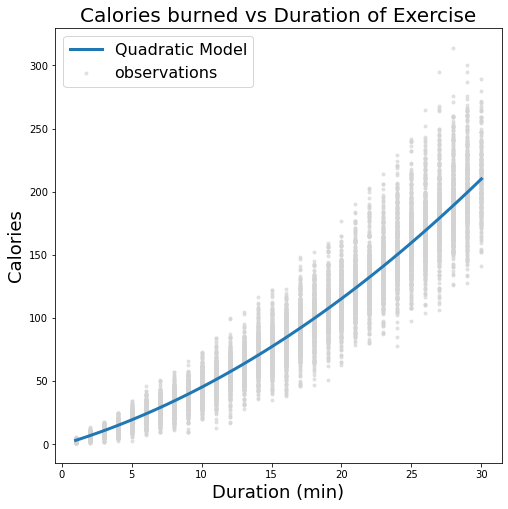

In [12]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

quad_reg = linear_model.LinearRegression()

T_train = t_train.reshape(-1,1)

quad = PolynomialFeatures(degree=2)
T_train_quad = quad.fit_transform(T_train)

quad_reg.fit(T_train_quad ,C_train.reshape(-1,1))

T_val = np.linspace(t_i.min(),t_i.max(),100).reshape(-1,1)
T_val_quad = quad.fit_transform(T_val)

C_quad_model = quad_reg.predict(T_val_quad)

plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:blue', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [13]:
C_quad_test = quad_reg.predict(quad.fit_transform(t_test.reshape(-1,1)))
C_quad_train = quad_reg.predict(quad.fit_transform(t_train.reshape(-1,1)))

df_model_properties.loc['quad_t']['MAE_test'] = mean_absolute_error(C_quad_test,C_test)
df_model_properties.loc['quad_t']['R2_test'] = r2_score(C_quad_test,C_test)
df_model_properties.loc['quad_t']['MAE_train'] = mean_absolute_error(C_quad_train,C_train)
df_model_properties.loc['quad_t']['R2_train'] = r2_score(C_quad_train,C_train)


print('Mean error (test): ',df_model_properties.loc['quad_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['quad_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['quad_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['quad_t']['R2_train'])


Mean error (test):  11.365273283651955
R2 (test):     0.9235407715434064

Mean error (train):  11.344388456602674
R2 (train):   0.9225497042024959


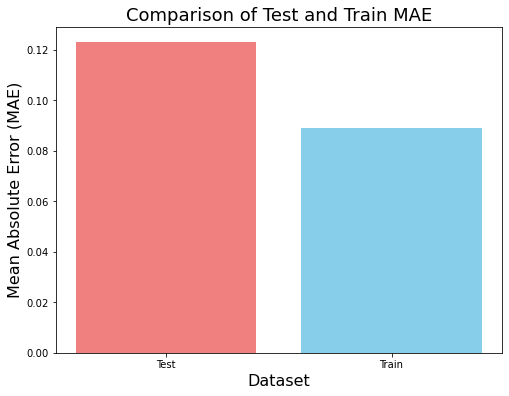

In [4]:
mae_test = 0.123  # Replace with your actual MAE test value
mae_train = 0.089  # Replace with your actual MAE train value

# Labels for the bars
labels = ['Test', 'Train']

# MAE values for the bars
mae_values = [mae_test, mae_train]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, mae_values, color=['lightcoral', 'skyblue'])
plt.xlabel('Dataset', size=16)
plt.ylabel('Mean Absolute Error (MAE)', size=16)
plt.title('Comparison of Test and Train MAE', size=18)
plt.show()

## Comparison

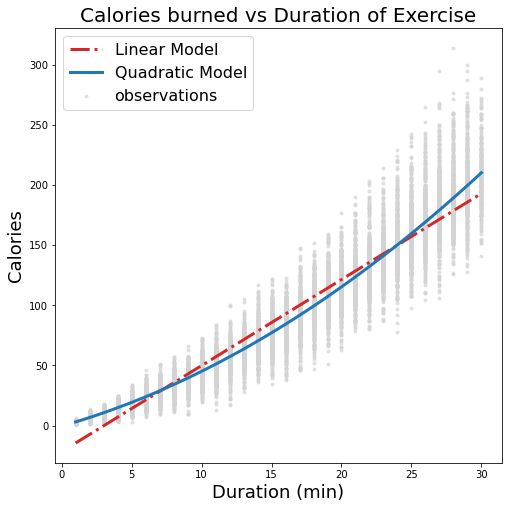

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:blue', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

<a id="0203"></a>
<h2>2.c Power Law Models<a href="#02"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

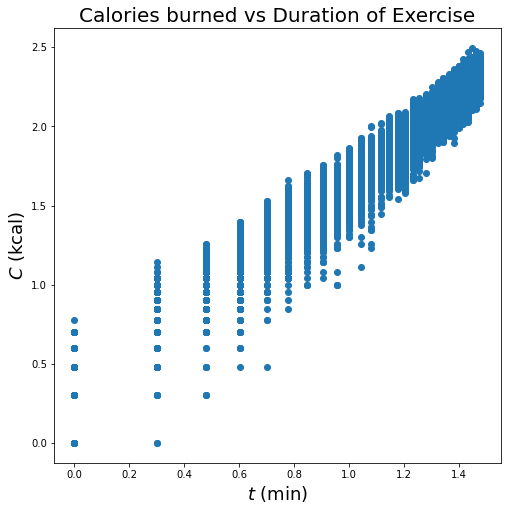

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f_log['log_t'],df_3f_log['log_C'])
plt.xlabel('$t$ (min)', size = 18)
plt.ylabel('$C$ (kcal)', size = 18)
plt.title('Calories burned vs Duration of Exercise', size = 20)
plt.show()

Proposing a linear correlation between these quantities is equivalent to:


$\log_{10}\left(\frac{C}{\text{kcal}}\right)=c_{0}+c_{1}\log_{10}\left(\frac{t}{\min}\right)\label{eq:lin_model_log} \tag{1}$


or:


$\frac{C}{\text{kcal}}=10^{c_{0}}\left(\frac{t}{\min}\right)^{c_{1}}\label{eq:lin_model} \tag{2}$

where $c_0$ is the linear coefficient and $c_1$ the slope of the line.


### 2.c.1 Single Parameter Power Model (SPPM)

An initial approach here is to fix $c_0 = 0$ in Eq.$(1)$, since that is intuitive that there are no calories burning if the exercise time is zero.

<center>
$\log_{10}\left(\frac{C}{\text{kcal}}\right)=c_{1}\log_{10}\left(\frac{t}{\min}\right)\label{eq:sim_log_model} \tag{3}$
</center>

First of all, we minimize the mean squared errors:

<center>$E_{\text{MS}}=\frac{1}{N}\sum_{i=1}^{N}\left[\log C(t_{i})-\log C_{i}\right]^{2}, \label{eq:sim_log_model_err} \tag{4}$</center>


vanishing the partial derivative with respect to $c_1$:

<center>$\frac{\partial E_{\text{MS}}}{\partial c_{1}}=0 .\label{eq:sim_log_min} \tag{5}$</center>


Expanding the formula for the errors:

<center>$
\begin{align*}
E_{\text{MS}} & =\frac{1}{N}\sum_{i=1}^{N}\left(\text{log}C-\text{log}C_{i}\right)^{2}=\frac{1}{N}\sum_{i=1}^{N}\left(c_{1}\log_{10}t_{i}-\text{log}C_{i}\right)^{2}\\
 & =c_{1}^{2}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}-2c_{1}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)+\frac{1}{N}\sum_{i=1}^{N}\left(\text{log}C_{i}\right)^{2}
\end{align*}
$</center>


 


Applying the minimization condition $(5)$:

<center>$
\begin{align*}
\frac{\partial E_{\text{MS}}}{\partial c_{1}} & =0\\
2c_{1}\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}-2\frac{1}{N}\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)+0 & =0
\end{align*}
$</center>

So, the formula for $c_1$ is:
<center>$
\begin{equation}
c_{1}=\frac{\sum_{i=1}^{N}\left(\log_{10}C_{i}\right)\left(\log_{10}t_{i}\right)}{\sum_{i=1}^{N}\left(\log_{10}t_{i}\right)^{2}}
\label{eq:sim_log_par_0} \tag{6}
\end{equation}
$</center>

With the value of $c_1$, we have the mathematical expression relating calories and exercise duration:

&nbsp;
<center>$\begin{equation}
\frac{C}{\text{kcal}}=\left(\frac{t}{\min}\right)^{c_{1}} .
\end{equation}$</center>

In [16]:

c_1 = np.dot(logC_train,logt_train)/np.dot(logt_train,logt_train)

print('The value of c_1 is: ',c_1)

def sing_par_predict(t,c1 = c_1):
    return np.power(t,c1) 

The value of c_1 is:  1.6065812051542228


Compare the model with data

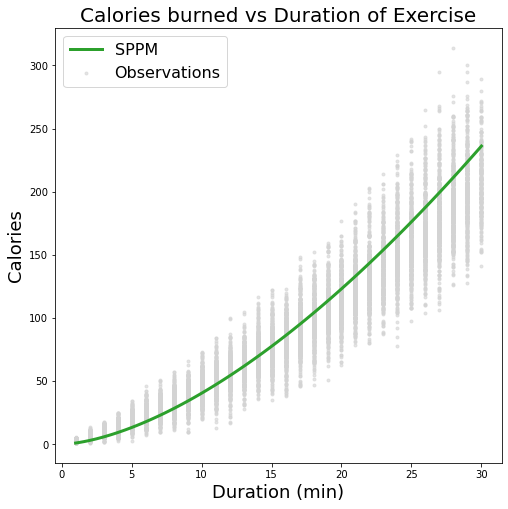

In [17]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_sing = sing_par_predict(t_val)

plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'Observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_sing, c='tab:green',ls='-', label = 'SPPM', linewidth = 3)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [18]:
C_sppm_test = sing_par_predict(t_test)
C_sppm_train = sing_par_predict(t_train)

df_model_properties.loc['SPPM_t']['MAE_test'] = mean_absolute_error(C_sppm_test,C_test)
df_model_properties.loc['SPPM_t']['R2_test'] = r2_score(C_sppm_test,C_test)
df_model_properties.loc['SPPM_t']['MAE_train'] = mean_absolute_error(C_sppm_train,C_train)
df_model_properties.loc['SPPM_t']['R2_train'] = r2_score(C_sppm_train,C_train)

print('Mean error (test): ',df_model_properties.loc['SPPM_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['SPPM_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['SPPM_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['SPPM_t']['R2_train'])


Mean error (test):  14.112527264878127
R2 (test):     0.9221687473557438

Mean error (train):  14.301879510269158
R2 (train):   0.918668278819145


### 2.c.2 Double Parameter Power Model (DPPM)¶

In the approach of taking the logs of **Calories** and **Duration** columns, the resulting correlations aproximately linear and can be modeled by an affine relation, like Eq. $(1)$ 

In [19]:
log_reg = linear_model.LinearRegression()

log_reg.fit(logt_train.reshape(-1,1),logC_train.reshape(-1,1))

logC_pred = log_reg.predict(logt_test.reshape(-1,1))

def dbl_par_predict(t):
    logt = np.log10(t)
    return  np.power(10,log_reg.predict(logt)) 

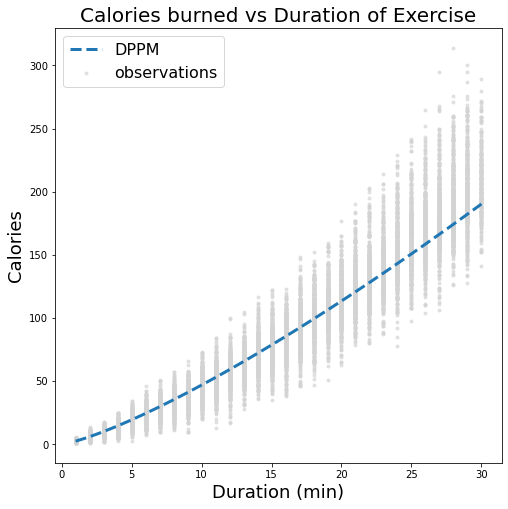

In [20]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_log_model = dbl_par_predict(t_val.reshape(-1,1))
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_log_model, c='tab:blue',ls='--', label = 'DPPM', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [21]:
C_dppm_test = dbl_par_predict(t_test.reshape(-1,1))
C_dppm_train = dbl_par_predict(t_train.reshape(-1,1))


df_model_properties.loc['DPPM_t']['MAE_test'] = mean_absolute_error(C_dppm_test,C_test)
df_model_properties.loc['DPPM_t']['R2_test'] = r2_score(C_dppm_test,C_test)
df_model_properties.loc['DPPM_t']['MAE_train'] = mean_absolute_error(C_dppm_train,C_train)
df_model_properties.loc['DPPM_t']['R2_train'] = r2_score(C_dppm_train,C_train)


print('Mean error (test): ',df_model_properties.loc['DPPM_t']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['DPPM_t']['R2_test'])


print('\nMean error (train): ',df_model_properties.loc['DPPM_t']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['DPPM_t']['R2_train'])


Mean error (test):  12.021118154420346
R2 (test):     0.8917909397979017

Mean error (train):  11.820742431418903
R2 (train):   0.8947519321424053


<a id="0204"></a>
<h2>2.2 Model Comparison<a href="#02"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

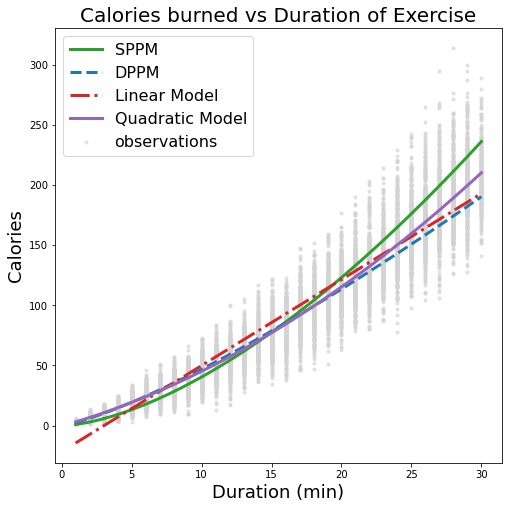

In [22]:
t_val = np.linspace(t_i.min(),t_i.max(),100)
C_lin_model = lin_reg.predict(t_val.reshape(-1,1))
C_log_model = dbl_par_predict(t_val.reshape(-1,1))
plt.figure(figsize=(8, 8))
plt.scatter(df['Duration'],df['Calories'],c='lightgray',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(t_val,C_sing, c='tab:green',ls='-', label = 'SPPM', lw = 3,zorder=2)
plt.plot(t_val,C_log_model, c='tab:blue',ls='--', label = 'DPPM', lw = 3,zorder=2)
plt.plot(t_val,C_lin_model, c='tab:red',ls='-.', label = 'Linear Model', lw = 3,zorder=2)
plt.plot(t_val,C_quad_model, label = 'Quadratic Model', c='tab:purple', lw = 3,zorder=2)
plt.xlabel('Duration (min)', size = 18)
plt.ylabel('Calories', size = 18); 
plt.legend(prop={'size': 16})
plt.title('Calories burned vs Duration of Exercise', size = 20);

### Report

* From visual inspection of graphs, it was found that the three most correlated amounts to calories are respectively **Duration**, **Heart Rate** and **Body Temperature**.

* The intial approach was to study only the influence of **Duration** (t) on **Calories**(C). To do this, it was proposed five different models:


    
| Model     | Mean Error | R2   |
|-----------|------------|------|
| Linear    | 13.59       | 0.904 |
| Quadratic | 11.36       | 0.922 |
| SPPM      | 14.11       | 0.919 |
| DPPM      | 12.02      | 0.895 |
| TPPM      | 11.40      | 0.919 |
    


* The linear regression model is the stardard approach when we observe a set of correlated 2-D data and will be used as comparison.

* The Power Law models, although not linear, can be linearized considering $\log_{10}t$ and $\log_{10}C$ as feature and target.

* The model SPPM is just a toy model. Since it has just 1 parameter, it was expected that its statistics were the worst. Although it showed a good value of R2, the error is significantly higher than those presented by the other models.

*  The DPPM, as the linear regression, is a 2-parameter model. Observing that the mean error is lower than the error of linear regression, in this case, we can find benefits in use of the logs on the datasets.

* **Quadratic regression** is the approach with lowest error and best R2

<a id="03" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  <div  style="margin-top: 9px; background-color: #efefef; padding-left:35px; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    
<h1>3. Double Feature Regression</h1>
    
<ol type="i">
    <li><a href="#0301" style="color: #37509b;">Linear Regression (2D)</a></li>
    <li><a href="#0302" style="color: #37509b;">Quadratic Regression (2D)</a></li>
    <li><a href="#0303" style="color: #37509b;">Linear Regression on Log-Scaled Data</a></li>
<!--     <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li> -->
<!--     <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li> -->

</ol>
</div>


In [24]:
TH_i = df_3f[['t','h']].to_numpy()
C_i = df_3f['C'].to_numpy().reshape(-1,1)
TH_trn, TH_tst, C_trn, C_tst = train_test_split( TH_i,C_i, test_size=0.333, random_state=42)

logTH_i = df_3f_log[['log_t','log_h']].to_numpy()
logC_i = df_3f_log['log_C'].to_numpy().reshape(-1,1)
logTH_trn, logTH_tst, logC_trn, logC_tst = train_test_split(logTH_i,logC_i,test_size=0.333, random_state=42)

<a id="0301"></a>
<h2>3.a Linear Regression (2D)<a href="#03"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [25]:
ML2 = linear_model.LinearRegression()

ML2.fit(TH_trn,C_trn)

C_ml2_tst = ML2.predict(TH_tst)
C_ml2_trn = ML2.predict(TH_trn)

df_model_properties.loc['multlin_th']['MAE_test'] = mean_absolute_error(C_tst,C_ml2_tst)
df_model_properties.loc['multlin_th']['R2_test'] = r2_score(C_tst,C_ml2_tst)
df_model_properties.loc['multlin_th']['MAE_train'] = mean_absolute_error(C_trn,C_ml2_trn)
df_model_properties.loc['multlin_th']['R2_train'] = r2_score(C_trn,C_ml2_trn)

print('Mean error (test): ',df_model_properties.loc['multlin_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_th']['R2_test'])
print('\nMean error (train): ',df_model_properties.loc['multlin_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_th']['R2_train'])


Mean error (test):  11.667718069629428
R2 (test):     0.936710281164849

Mean error (train):  11.493310827379927
R2 (train):   0.9388026851404877


<a id="0302"></a>
<h2>3.b Quadratic Regression (2D)<a href="#03"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [26]:
MQ2 = linear_model.LinearRegression()

MQ2_poly = PolynomialFeatures(degree=2)

TH_trn_pl = MQ2_poly.fit_transform(TH_trn)

TH_tst_pl = MQ2_poly.fit_transform(TH_tst)

MQ2.fit(TH_trn_pl,C_trn)

C_mq2_tst = MQ2.predict(TH_tst_pl)

C_mq2_trn = MQ2.predict(TH_trn_pl)

df_model_properties.loc['multquad_th']['MAE_test'] = mean_absolute_error(C_tst,C_mq2_tst)
df_model_properties.loc['multquad_th']['R2_test'] = r2_score(C_tst,C_mq2_tst)
df_model_properties.loc['multquad_th']['MAE_train'] = mean_absolute_error(C_trn,C_mq2_trn)
df_model_properties.loc['multquad_th']['R2_train'] = r2_score(C_trn,C_mq2_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_th']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_th']['R2_train'])


Mean error (test):  8.296957448492797
R2 (test):     0.9610619558653578

Mean error (train):  8.13797201129815
R2 (train):   0.9624337462717035


<a id="0303"></a>
<h2>3.c Linear Regression on Log-Scaled Data<a href="#03"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [27]:
MP1 = linear_model.LinearRegression()

MP1.fit(logTH_trn,logC_trn)

def power_pth_predict(TH):
    logTH = np.log10(TH)
    return  np.power(10,MP1.predict(logTH))

In [28]:
C_mp1_tst = power_pth_predict(TH_tst)
C_mp1_trn = power_pth_predict(TH_trn)

df_model_properties.loc['power_th']['MAE_test'] = mean_absolute_error(C_tst,C_mp1_tst)
df_model_properties.loc['power_th']['R2_test'] = r2_score(C_tst,C_mp1_tst)

df_model_properties.loc['power_th']['MAE_train'] = mean_absolute_error(C_trn,C_mp1_trn)
df_model_properties.loc['power_th']['R2_train'] = r2_score(C_trn,C_mp1_trn)


print('Mean error (test): ',df_model_properties.loc['power_th']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['power_th']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['power_th']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['power_th']['R2_train'])


Mean error (test):  8.598564469552045
R2 (test):     0.9594573580056064

Mean error (train):  8.449130114442275
R2 (train):   0.9604518661920016



<a id="04" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  
<div  style="margin-top: 9px; background-color: #efefef; padding-left:35px; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    
<h1>4. Three Feature Regression</h1>
    
<ol type="i">
    <li><a href="#0401" style="color: #37509b;">Linear Regression</a></li>
    <li><a href="#0402" style="color: #37509b;">Quadratic Regression</a></li>
<!--     <li><a href="#0103" style="color: #37509b;">Funcoes</a></li>
    <li><a href="#0104" style="color: #37509b;">Dados de Indicadores Sociais</a></li>
    <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li>
 -->
</ol>
</div>


In [29]:
THT_i = df_3f[['t','h','T']].to_numpy()
C_i = df_3f['C'].to_numpy().reshape(-1,1)
THT_trn, THT_tst, C_trn, C_tst = train_test_split( THT_i,C_i, test_size=0.333, random_state=42)

logTHT_i = df_3f_log[['log_t','log_h','log_T']].to_numpy()
logC_i = df_3f_log['log_C'].to_numpy().reshape(-1,1)
logTHT_trn, logTHT_tst, logC_trn, logC_tst = train_test_split(logTHT_i,logC_i,test_size=0.333, random_state=42)


<a id="0401"></a>
<h2>4.a Linear Regression (3D)<a href="#04"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [30]:
ML3 = linear_model.LinearRegression()

ML3.fit(THT_trn,C_trn)

C_ml3_tst = ML3.predict(THT_tst)
C_ml3_trn = ML3.predict(THT_trn)


df_model_properties.loc['multlin_tht']['MAE_test'] = mean_absolute_error(C_tst,C_ml3_tst)
df_model_properties.loc['multlin_tht']['R2_test'] = r2_score(C_tst,C_ml3_tst)

df_model_properties.loc['multlin_tht']['MAE_train'] = mean_absolute_error(C_trn,C_ml3_trn)
df_model_properties.loc['multlin_tht']['R2_train'] = r2_score(C_trn,C_ml3_trn)


print('Mean error (test): ',df_model_properties.loc['multlin_tht']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_tht']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multlin_tht']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_tht']['R2_train'])

Mean error (test):  10.647808909098178
R2 (test):     0.9451629732671258

Mean error (train):  10.51635353712152
R2 (train):   0.9467824214841805


<a id="0402"></a>
<h2>4.b Quadratic Regression (3D)<a href="#04"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>

In [31]:
MQ3 = linear_model.LinearRegression()

MQ3_poly = PolynomialFeatures(degree=2)
THT_trn_pl = MQ3_poly.fit_transform(THT_trn)
THT_tst_pl = MQ3_poly.fit_transform(THT_tst)


MQ3.fit(THT_trn_pl,C_trn)

C_mq3_tst = MQ3.predict(THT_tst_pl)
C_mq3_trn = MQ3.predict(THT_trn_pl)

df_model_properties.loc['multquad_tht']['MAE_test'] = mean_absolute_error(C_tst,C_mq3_tst)
df_model_properties.loc['multquad_tht']['R2_test'] = r2_score(C_tst,C_mq3_tst)

df_model_properties.loc['multquad_tht']['MAE_train'] = mean_absolute_error(C_trn,C_mq3_trn)
df_model_properties.loc['multquad_tht']['R2_train'] = r2_score(C_trn,C_mq3_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_tht']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_tht']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_tht']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_tht']['R2_train'])


Mean error (test):  8.307127256867178
R2 (test):     0.9610771458585454

Mean error (train):  8.14242986973571
R2 (train):   0.9624488806614029


<a id="05" style="
  background-color: #37509b;
  border: none;
  color: white;
  padding: 2px 10px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 10px;" href="#toc">TOC ↻</a>
  
  <div  style="margin-top: 9px; background-color: #efefef; padding-left:35px; padding-top:10px; padding-bottom:10px;margin-bottom: 9px;box-shadow: 5px 5px 5px 0px rgba(87, 87, 87, 0.2);">
    
<h1>5. Regression with all Features</h1>
    
<ol type="i">
    <li><a href="#0501" style="color: #37509b;">Linear Regression</a></li>
    <li><a href="#0502" style="color: #37509b;">Quadratic Regression</a></li>
    <li><a href="#0503" style="color: #37509b;">Cubic Regression</a></li>
    <li><a href="#0504" style="color: #37509b;">Quartic Regression</a></li>
<!--     <li><a href="#0105" style="color: #37509b;">Dados de COVID-19</a></li> -->

</ol>
</div>

In [32]:
X_i = df_7f[['t','h','T','A','W','G','H']].to_numpy()
C_i = df_7f['C'].to_numpy().reshape(-1,1)
X_trn, X_tst, C_trn, C_tst = train_test_split( X_i,C_i, test_size=0.333, random_state=42)


<a id="0501"></a>
<h2>5.a Linear Regression (6D)<a href="#05"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>


In [33]:
ML6 = linear_model.LinearRegression()

ML6.fit(X_trn,C_trn)

C_ml6_tst = ML6.predict(X_tst)
C_ml6_trn = ML6.predict(X_trn)


df_model_properties.loc['multlin_all']['MAE_test'] = mean_absolute_error(C_tst,C_ml6_tst)
df_model_properties.loc['multlin_all']['R2_test'] = r2_score(C_tst,C_ml6_tst)

df_model_properties.loc['multlin_all']['MAE_train'] = mean_absolute_error(C_trn,C_ml6_trn)
df_model_properties.loc['multlin_all']['R2_train'] = r2_score(C_trn,C_ml6_trn)


print('Mean error (test): ',df_model_properties.loc['multlin_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multlin_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multlin_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multlin_all']['R2_train'])

Mean error (test):  8.437652846858738
R2 (test):     0.9664081290862842

Mean error (train):  8.28158203316544
R2 (train):   0.9675871034049008


<a id="0502"></a>
<h2>5.b Quadratic Regression (6D)<a href="#05"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>


In [ ]:
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=2)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multquad_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multquad_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multquad_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multquad_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multquad_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquad_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquad_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquad_all']['R2_train'])


<a id="0503"></a>
<h2>5.c Cubic Regression (6D)<a href="#05"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>


In [34]:
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=3)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multcub_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multcub_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multcub_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multcub_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multcub_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multcub_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multcub_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multcub_all']['R2_train'])


Mean error (test):  0.25382255623049294
R2 (test):     0.9999782665063185

Mean error (train):  0.2504124453548507
R2 (train):   0.9999784303299277


<a id="0504"></a>
<h2>5.d Quartic Regression (6D)<a href="#05"
style="
    border-radius: 10px;
    background-color: #f1f1f1;
    border: none;
    color: #37509b;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    padding: 4px 4px;
    font-size: 14px;
">↻</a></h2>


In [35]:
MQ6 = linear_model.LinearRegression()

MQ6_poly = PolynomialFeatures(degree=4)
X_trn_pl = MQ6_poly.fit_transform(X_trn)
X_tst_pl = MQ6_poly.fit_transform(X_tst)


MQ6.fit(X_trn_pl,C_trn)

C_mq6_tst = MQ6.predict(X_tst_pl)
C_mq6_trn = MQ6.predict(X_trn_pl)

df_model_properties.loc['multquart_all']['MAE_test'] = mean_absolute_error(C_tst,C_mq6_tst)
df_model_properties.loc['multquart_all']['R2_test'] = r2_score(C_tst,C_mq6_tst)

df_model_properties.loc['multquart_all']['MAE_train'] = mean_absolute_error(C_trn,C_mq6_trn)
df_model_properties.loc['multquart_all']['R2_train'] = r2_score(C_trn,C_mq6_trn)


print('Mean error (test): ',df_model_properties.loc['multquart_all']['MAE_test'])
print('R2 (test):    ',df_model_properties.loc['multquart_all']['R2_test'])

print('\nMean error (train): ',df_model_properties.loc['multquart_all']['MAE_train'])
print('R2 (train):  ',df_model_properties.loc['multquart_all']['R2_train'])


Mean error (test):  0.2552338831483984
R2 (test):     0.9999778601382684

Mean error (train):  0.2471573919390311
R2 (train):   0.9999788452711166


In [36]:
df_model_properties

,Features,MAE_test,R2_test,MAE_train,R2_train
Model,,,,,
linear_t,[t],13.5939,0.902631,13.5028,0.904407
quad_t,[t],11.3653,0.923541,11.3444,0.92255
SPPM_t,[t],14.1125,0.922169,14.3019,0.918668
DPPM_t,[t],12.0211,0.891791,11.8207,0.894752
multlin_th,"[t, h]",11.6677,0.93671,11.4933,0.938803
multquad_th,"[t, h]",8.29696,0.961062,8.13797,0.962434
power_th,"[t, h]",8.59856,0.959457,8.44913,0.960452
multlin_tht,"[t, h, T]",10.6478,0.945163,10.5164,0.946782
multquad_tht,"[t, h, T]",8.30713,0.961077,8.14243,0.962449
